In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import skimage
import SimpleITK as sitk

# Original Image

In [2]:
relative_path_1 = "data/04_060__150_00_01_00C_230922_3D.tif"
relative_path_2 = "data/04_060_150_01_01_005_230920_3D.tif"
relative_path_3 = "data/04_060_150_01_04_008_230920_3D.tif"

img = utils.read_image(relative_path_1)
img_crop = img[4500:6000, 4500:6000]

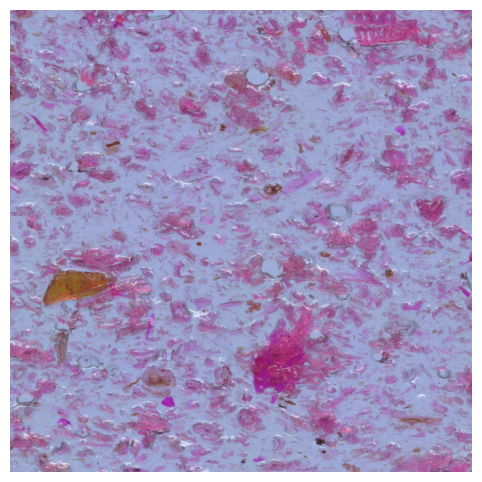

In [3]:
utils.print_image(img_crop)

## RGB Channels

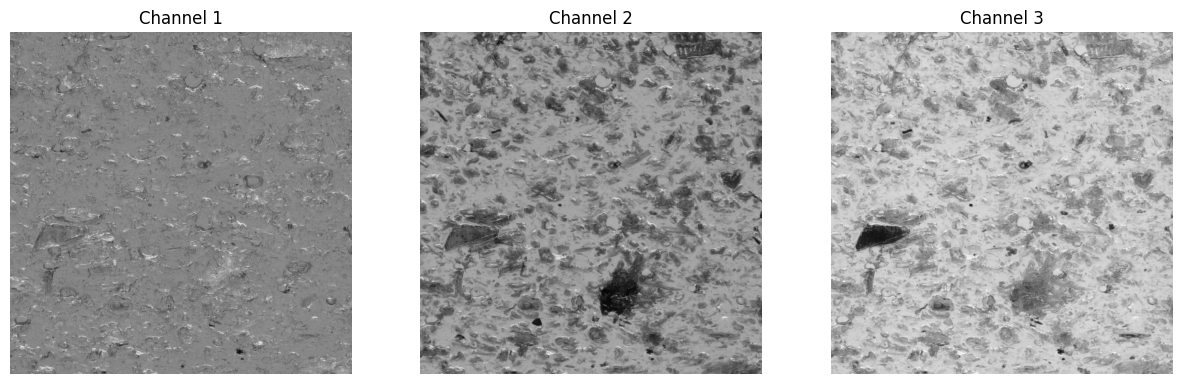

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(img_crop[:, :, i], cmap="gray")
    axs[i].set_title(f"Channel {i+1}")
    axs[i].axis("off")

### RGB Histograms

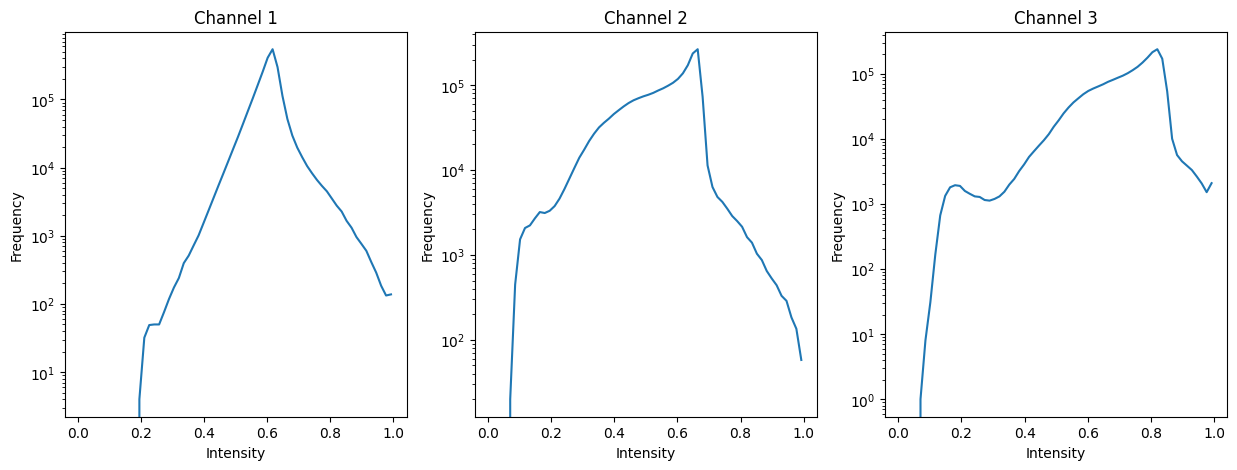

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_yscale("log")
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i+1}")

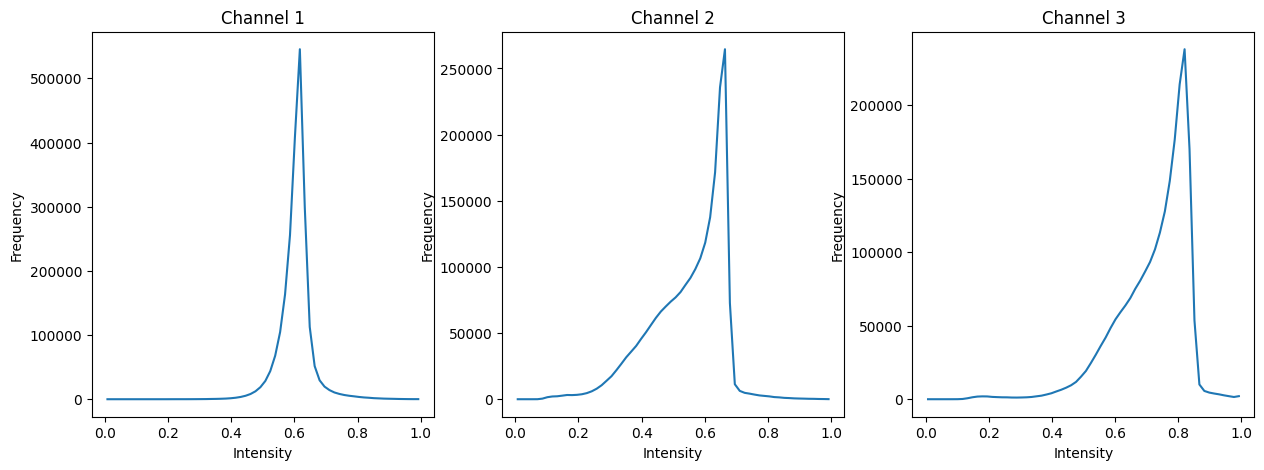

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i+1}")

## HSV Channels

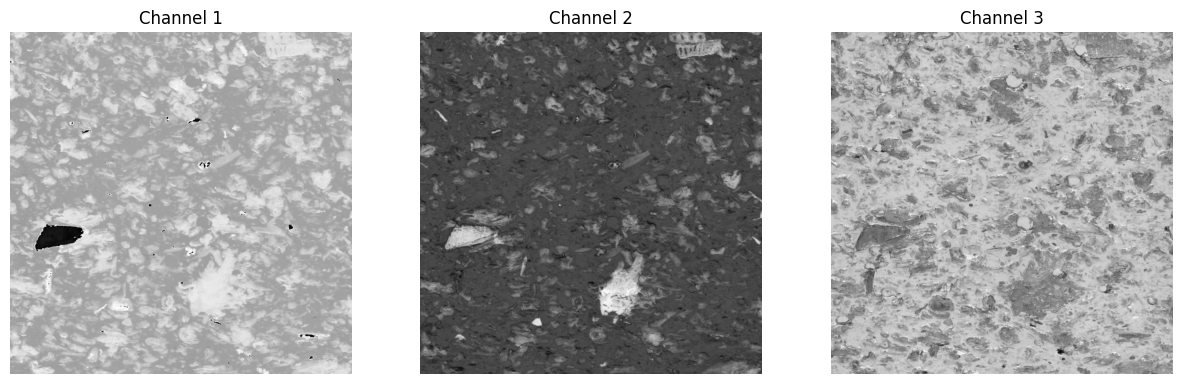

In [7]:
img_crop_hsv = skimage.color.rgb2hsv(img_crop)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(img_crop_hsv[:, :, i], cmap="gray")
    axs[i].set_title(f"Channel {i+1}")
    axs[i].axis("off")

### HSV Histograms

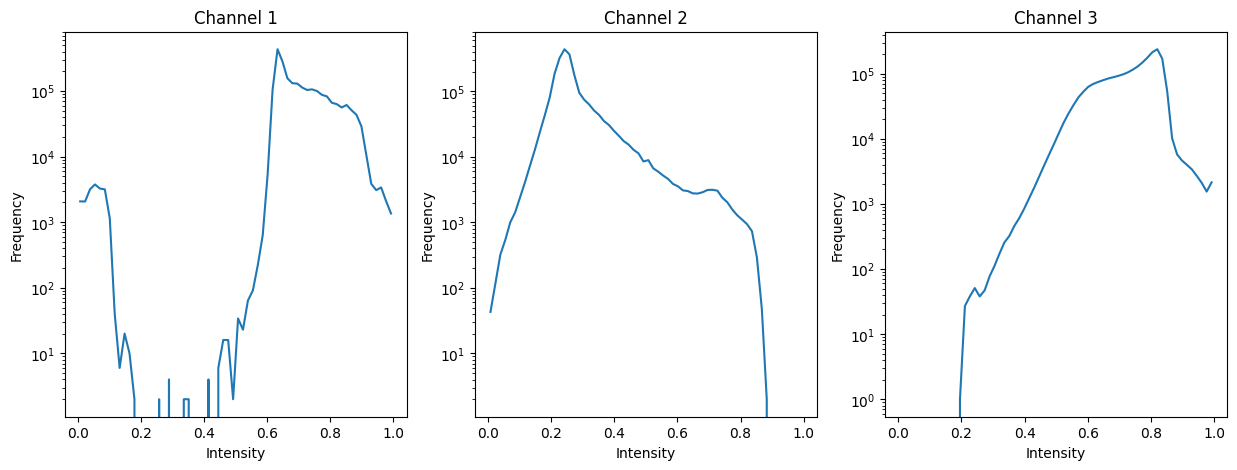

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop_hsv[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_yscale("log")
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i+1}")

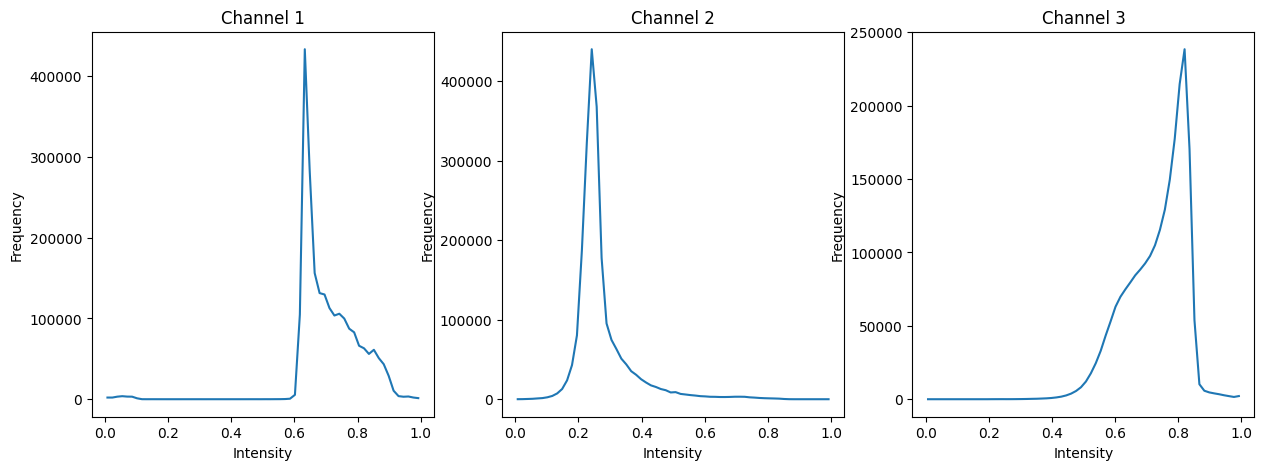

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    hist, bins = np.histogram(img_crop_hsv[:, :, i], bins=64, range=(0.0, 1.0))

    lower = (bins[0] + bins[1]) / 2
    upper = (bins[-1] + bins[-2]) / 2

    pixel_values = np.linspace(lower, upper, len(hist))

    axs[i].plot(pixel_values, hist)
    axs[i].set_xlabel("Intensity")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Channel {i+1}")

# Otsu Thresholding on HSV Channel 1

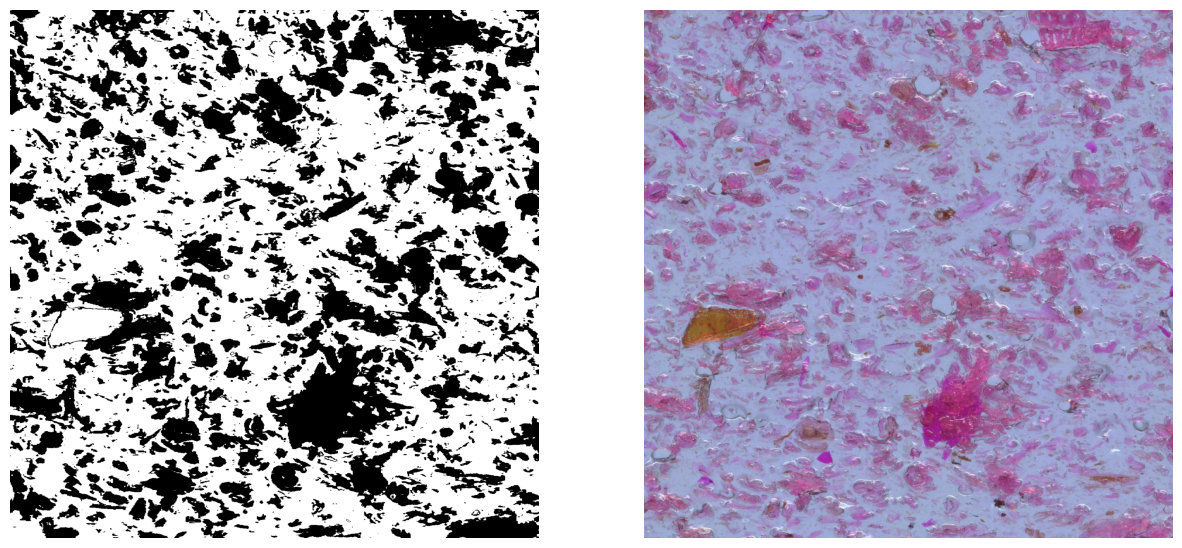

In [10]:
hue = img_crop_hsv[:, :, 0]

hue_otsu_img = sitk.OtsuThreshold(sitk.GetImageFromArray(hue))

utils.print_images([sitk.GetArrayViewFromImage(hue_otsu_img), img_crop])

## Manual Thresholding HSV Channel 1

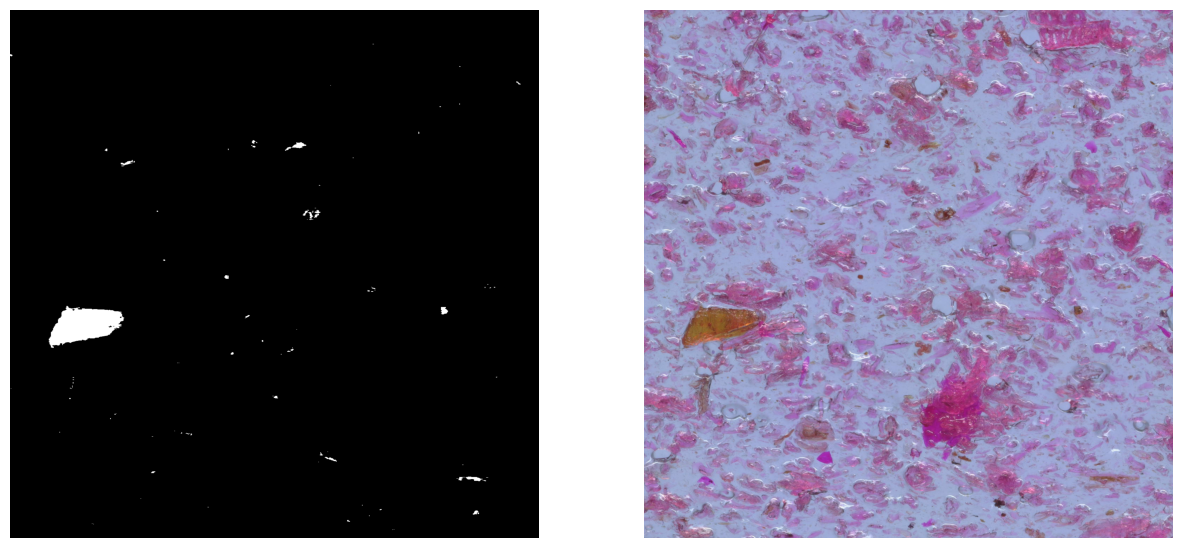

In [11]:
hue = img_crop_hsv[:, :, 0]

hue_mask = (hue < 0.4).astype(np.float32)

utils.print_images([hue_mask, img_crop])